In [1]:
import os
from PIL import Image
from diffusers import StableDiffusionUpscalePipeline, LDMSuperResolutionPipeline
from super_image import EdsrModel, ImageLoader
import torch
import cv2

img_dir = '../Mosquito-on-human-skin/Aedes aegypti smashed'
save_dir = '../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4'

def upsample_folder_stabilityai(img_dir: str, save_dir: str):

    os.makedirs(save_dir, exist_ok=True)
    # load model and scheduler
    model_id = "stabilityai/stable-diffusion-x4-upscaler"
    pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipeline = pipeline.to("cuda")
    
    
    for img_path in os.listdir(img_dir):
        if os.path.splitext(img_path)[-1] in ['.png', '.jpeg', '.jpg']:
            print(f'Processing {img_path}...')
            low_res_img = Image.open(os.path.join(img_dir, img_path)).convert("RGB")
            
            upscaled_image = pipeline(prompt="a mosquito on human skin", image=low_res_img).images[0]
        
            save_path = os.path.join(save_dir, img_path)
            upscaled_image.save(save_path)
        
            print(f'Saved image to {save_path}...')


def upsample_folder_compvis(img_dir: str, save_dir: str):

    os.makedirs(save_dir, exist_ok=True)

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model_id = "CompVis/ldm-super-resolution-4x-openimages"    
    # load model and scheduler
    pipeline = LDMSuperResolutionPipeline.from_pretrained(model_id)
    pipeline = pipeline.to(device)
    
    for img_path in os.listdir(img_dir):
        if os.path.splitext(img_path)[-1] in ['.png', '.jpeg', '.jpg']:
            print(f'Processing {img_path}...')
            low_res_img = Image.open(os.path.join(img_dir, img_path)).convert("RGB")
            
            upscaled_image = pipeline(low_res_img, num_inference_steps=100, eta=1).images[0]
        
            save_path = os.path.join(save_dir, img_path)
            upscaled_image.save(save_path)
        
            print(f'Saved image to {save_path}...')

def upsample_opencv(img_dir: str, save_dir: str):
    os.makedirs(save_dir, exist_ok=True)

    for img_path in os.listdir(img_dir):
        if os.path.splitext(img_path)[-1] in ['.png', '.jpeg', '.jpg']:
            print(f'Processing {img_path}...')

            low_res_img = cv2.imread(os.path.join(img_dir, img_path), cv2.IMREAD_UNCHANGED)
            w, h = low_res_img.shape[:2]
            upscaled_image = cv2.resize(low_res_img, (4*w, 4*h), interpolation = cv2.INTER_LANCZOS4)
            
            save_path = os.path.join(save_dir, img_path)
            cv2.imwrite(save_path, upscaled_image)
            print(f'Saved image to {save_path}...')



def upsample_edsr(img_dir: str, save_dir: str):
    os.makedirs(save_dir, exist_ok=True)
    for img_path in os.listdir(img_dir):
        if os.path.splitext(img_path)[-1] in ['.png', '.jpeg', '.jpg']:
            print(f'Processing {img_path}...')
            low_res_img = Image.open(os.path.join(img_dir, img_path)).convert("RGB")
    
            model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=4)    
            inputs = ImageLoader.load_image(low_res_img)
            preds = model(inputs)

            save_path = os.path.join(save_dir, img_path)
            ImageLoader.save_image(preds, save_path)      
            print(f'Saved image to {save_path}...')
            
upsample_folder_compvis(img_dir, save_dir)

2023-09-13 19:31:41.930819: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Processing 40.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/40.jpg...
Processing 110.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/110.jpg...
Processing 149.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/149.jpg...
Processing 208.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/208.jpg...
Processing 102.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/102.jpg...
Processing 159.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/159.jpg...
Processing 18.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/18.jpg...
Processing 48.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/48.jpg...
Processing 239.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/239.jpg...
Processing 158.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/158.jpg...
Processing 231.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/231.jpg...
Processing 135.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/135.jpg...
Processing 31.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/31.jpg...
Processing 170.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/170.jpg...
Processing 42.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/42.jpg...
Processing 215.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/215.jpg...
Processing 247.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/247.jpg...
Processing 72.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/72.jpg...
Processing 67.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/67.jpg...
Processing 138.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/138.jpg...
Processing 171.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/171.jpg...
Processing 7.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/7.jpg...
Processing 65.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/65.jpg...
Processing 141.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/141.jpg...
Processing 147.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/147.jpg...
Processing 144.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/144.jpg...
Processing 238.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/238.jpg...
Processing 47.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/47.jpg...
Processing 128.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/128.jpg...
Processing 142.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/142.jpg...
Processing 189.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/189.jpg...
Processing 23.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/23.jpg...
Processing 195.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/195.jpg...
Processing 91.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/91.jpg...
Processing 45.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/45.jpg...
Processing 191.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/191.jpg...
Processing 176.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/176.jpg...
Processing 204.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/204.jpg...
Processing 13.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/13.jpg...
Processing 30.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/30.jpg...
Processing 66.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/66.jpg...
Processing 243.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/243.jpg...
Processing 222.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/222.jpg...
Processing 193.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/193.jpg...
Processing 86.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/86.jpg...
Processing 203.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/203.jpg...
Processing 32.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/32.jpg...
Processing 108.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/108.jpg...
Processing 155.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/155.jpg...
Processing 218.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/218.jpg...
Processing 226.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/226.jpg...
Processing 233.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/233.jpg...
Processing 78.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/78.jpg...
Processing 209.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/209.jpg...
Processing 6.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/6.jpg...
Processing 200.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/200.jpg...
Processing 145.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/145.jpg...
Processing 224.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/224.jpg...
Processing 211.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/211.jpg...
Processing 103.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/103.jpg...
Processing 46.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/46.jpg...
Processing 50.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/50.jpg...
Processing 75.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/75.jpg...
Processing 106.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/106.jpg...
Processing 53.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/53.jpg...
Processing 223.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/223.jpg...
Processing 196.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/196.jpg...
Processing 41.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/41.jpg...
Processing 168.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/168.jpg...
Processing 63.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/63.jpg...
Processing 17.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/17.jpg...
Processing 52.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/52.jpg...
Processing 97.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/97.jpg...
Processing 192.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/192.jpg...
Processing 181.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/181.jpg...
Processing 59.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/59.jpg...
Processing 15.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/15.jpg...
Processing 34.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/34.jpg...
Processing 153.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/153.jpg...
Processing 221.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/221.jpg...
Processing 116.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/116.jpg...
Processing 185.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/185.jpg...
Processing 0.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/0.jpg...
Processing 129.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/129.jpg...
Processing 217.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/217.jpg...
Processing 232.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/232.jpg...
Processing 242.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/242.jpg...
Processing 234.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/234.jpg...
Processing 92.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/92.jpg...
Processing 150.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/150.jpg...
Processing 69.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/69.jpg...
Processing 151.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/151.jpg...
Processing 146.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/146.jpg...
Processing 179.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/179.jpg...
Processing 139.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/139.jpg...
Processing 227.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/227.jpg...
Processing 180.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/180.jpg...
Processing 178.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/178.jpg...
Processing 2.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/2.jpg...
Processing 172.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/172.jpg...
Processing 137.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/137.jpg...
Processing 39.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/39.jpg...
Processing 12.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/12.jpg...
Processing 207.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/207.jpg...
Processing 230.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/230.jpg...
Processing 55.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/55.jpg...
Processing 113.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/113.jpg...
Processing 8.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/8.jpg...
Processing 77.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/77.jpg...
Processing 79.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/79.jpg...
Processing 237.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/237.jpg...
Processing 175.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/175.jpg...
Processing 9.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/9.jpg...
Processing 240.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/240.jpg...
Processing 80.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/80.jpg...
Processing 219.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/219.jpg...
Processing 123.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/123.jpg...
Processing 120.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/120.jpg...
Processing 38.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/38.jpg...
Processing 213.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/213.jpg...
Processing 60.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/60.jpg...
Processing 186.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/186.jpg...
Processing 121.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/121.jpg...
Processing 112.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/112.jpg...
Processing 14.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/14.jpg...
Processing 161.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/161.jpg...
Processing 197.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/197.jpg...
Processing 37.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/37.jpg...
Processing 119.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/119.jpg...
Processing 188.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/188.jpg...
Processing 111.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/111.jpg...
Processing 49.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/49.jpg...
Processing 124.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/124.jpg...
Processing 194.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/194.jpg...
Processing 210.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/210.jpg...
Processing 35.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/35.jpg...
Processing 154.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/154.jpg...
Processing 130.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/130.jpg...
Processing 160.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/160.jpg...
Processing 220.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/220.jpg...
Processing 169.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/169.jpg...
Processing 89.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/89.jpg...
Processing 152.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/152.jpg...
Processing 57.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/57.jpg...
Processing 109.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/109.jpg...
Processing 3.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/3.jpg...
Processing 167.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/167.jpg...
Processing 87.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/87.jpg...
Processing 104.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/104.jpg...
Processing 248.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/248.jpg...
Processing 10.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/10.jpg...
Processing 246.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/246.jpg...
Processing 229.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/229.jpg...
Processing 165.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/165.jpg...
Processing 105.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/105.jpg...
Processing 11.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/11.jpg...
Processing 70.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/70.jpg...
Processing 249.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/249.jpg...
Processing 157.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/157.jpg...
Processing 241.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/241.jpg...
Processing 88.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/88.jpg...
Processing 96.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/96.jpg...
Processing 83.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/83.jpg...
Processing 182.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/182.jpg...
Processing 115.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/115.jpg...
Processing 216.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/216.jpg...
Processing 199.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/199.jpg...
Processing 212.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/212.jpg...
Processing 73.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/73.jpg...
Processing 94.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/94.jpg...
Processing 107.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/107.jpg...
Processing 101.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/101.jpg...
Processing 187.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/187.jpg...
Processing 148.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/148.jpg...
Processing 33.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/33.jpg...
Processing 163.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/163.jpg...
Processing 61.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/61.jpg...
Processing 164.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/164.jpg...
Processing 235.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/235.jpg...
Processing 85.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/85.jpg...
Processing 27.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/27.jpg...
Processing 29.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/29.jpg...
Processing 22.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/22.jpg...
Processing 90.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/90.jpg...
Processing 236.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/236.jpg...
Processing 76.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/76.jpg...
Processing 166.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/166.jpg...
Processing 214.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/214.jpg...
Processing 71.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/71.jpg...
Processing 58.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/58.jpg...
Processing 21.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/21.jpg...
Processing 117.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/117.jpg...
Processing 122.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/122.jpg...
Processing 228.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/228.jpg...
Processing 118.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/118.jpg...
Processing 81.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/81.jpg...
Processing 43.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/43.jpg...
Processing 136.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/136.jpg...
Processing 99.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/99.jpg...
Processing 44.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/44.jpg...
Processing 183.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/183.jpg...
Processing 244.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/244.jpg...
Processing 95.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/95.jpg...
Processing 133.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/133.jpg...
Processing 1.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/1.jpg...
Processing 54.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/54.jpg...
Processing 16.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/16.jpg...
Processing 4.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/4.jpg...
Processing 5.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/5.jpg...
Processing 190.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/190.jpg...
Processing 114.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/114.jpg...
Processing 205.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/205.jpg...
Processing 74.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/74.jpg...
Processing 93.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/93.jpg...
Processing 98.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/98.jpg...
Processing 84.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/84.jpg...
Processing 25.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/25.jpg...
Processing 26.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/26.jpg...
Processing 62.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/62.jpg...
Processing 51.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/51.jpg...
Processing 206.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/206.jpg...
Processing 19.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/19.jpg...
Processing 82.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/82.jpg...
Processing 225.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/225.jpg...
Processing 198.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/198.jpg...
Processing 131.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/131.jpg...
Processing 173.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/173.jpg...
Processing 56.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/56.jpg...
Processing 100.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/100.jpg...
Processing 36.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/36.jpg...
Processing 201.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/201.jpg...
Processing 127.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/127.jpg...
Processing 202.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/202.jpg...
Processing 68.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/68.jpg...
Processing 177.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/177.jpg...
Processing 125.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/125.jpg...
Processing 143.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/143.jpg...
Processing 174.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/174.jpg...
Processing 245.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/245.jpg...
Processing 64.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/64.jpg...
Processing 28.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/28.jpg...
Processing 134.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/134.jpg...
Processing 184.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/184.jpg...
Processing 126.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/126.jpg...
Processing 132.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/132.jpg...
Processing 24.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/24.jpg...
Processing 140.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/140.jpg...
Processing 20.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/20.jpg...
Processing 162.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/162.jpg...
Processing 156.jpg...


  0%|          | 0/100 [00:00<?, ?it/s]

Saved image to ../Mosquito-on-human-skin/Aedes_aegypti_smashed_compvis_x4/156.jpg...


# OWL-ViT

In [55]:
import csv
import os

import torch
from PIL import Image
from transformers import OwlViTProcessor, OwlViTForObjectDetection
import numpy as np

def annotate_images(img_dir: str, save_path: str):
    owl_processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32", cache_dir='models/owl/')
    owl_model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32", cache_dir='models/owl/').cuda()
    folder_name = os.path.split(img_dir)[-1]
    data = []
    
    for img_path in os.listdir(img_dir):
        if os.path.splitext(img_path)[-1] in ['.png', '.jpeg', '.jpg']:
            print(f'Processing {img_path}...')
            image = Image.open(os.path.join(img_dir, img_path)).convert("RGB")
            with torch.no_grad():
                texts = [["a photo of a mosquito"]]
                inputs = owl_processor(text=texts, images=image, return_tensors="pt").to('cuda')
                outputs = owl_model(**inputs)
                # Target image sizes (height, width) to rescale box predictions [batch_size, 2]
                target_sizes = torch.Tensor([image.size[::-1]]).to('cuda')
            
                # Convert outputs (bounding boxes and class logits) to COCO API
                results = owl_processor.post_process_object_detection(outputs=outputs, 
                                                                  target_sizes=target_sizes, 
                                                                  threshold=0.01)
            
                i = 0  # Retrieve predictions for the first image for the corresponding text queries
                text = texts[i]
                boxes, scores, labels = results[i]["boxes"].cpu().numpy(), results[i]["scores"].cpu().numpy(), results[i]["labels"].cpu().numpy()
                best_score_index = np.argmax(scores)
                boxes, scores, labels = boxes[best_score_index], scores[best_score_index], labels[best_score_index]
    
            width, height = image.size
            data.append({
                "img_fName": f'{folder_name}_{img_path}',
                "img_w": width,
                "img_h": height,
                "bbx_xtl": int(boxes[0]),
                "bbx_ytl": int(boxes[1]),
                "bbx_xbr": int(boxes[2]),
                "bbx_ybr": int(boxes[3]),
                "class_label": "aegypti",
            })

    with open(save_path, 'w') as csvfile:
        fieldnames = ['img_fName','img_w','img_h','bbx_xtl','bbx_ytl','bbx_xbr','bbx_ybr','class_label']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)


annotate_images('../Mosquito-on-human-skin/Aedes_aegypti_smashed_stabilityai_x4', 
                '../Mosquito-on-human-skin/Aedes_aegypti_smashed_stabilityai_x4.csv')

annotate_images('../Mosquito-on-human-skin/Aedes_aegypti_landing_stabilityai_x4', 
                '../Mosquito-on-human-skin/Aedes_aegypti_landing_stabilityai_x4.csv')

annotate_images('../mosqutio_kaggle/aegypti_0', 
                '../mosqutio_kaggle/aegypti_0.csv')



Processing 40.jpg...
Processing 110.jpg...
Processing 149.jpg...
Processing 208.jpg...
Processing 102.jpg...
Processing 159.jpg...
Processing 18.jpg...
Processing 48.jpg...
Processing 239.jpg...
Processing 158.jpg...
Processing 231.jpg...
Processing 135.jpg...
Processing 31.jpg...
Processing 170.jpg...
Processing 42.jpg...
Processing 215.jpg...
Processing 247.jpg...
Processing 72.jpg...
Processing 67.jpg...
Processing 138.jpg...
Processing 171.jpg...
Processing 7.jpg...
Processing 65.jpg...
Processing 141.jpg...
Processing 147.jpg...
Processing 144.jpg...
Processing 238.jpg...
Processing 47.jpg...
Processing 128.jpg...
Processing 142.jpg...
Processing 189.jpg...
Processing 23.jpg...
Processing 195.jpg...
Processing 91.jpg...
Processing 45.jpg...
Processing 191.jpg...
Processing 176.jpg...
Processing 204.jpg...
Processing 13.jpg...
Processing 30.jpg...
Processing 66.jpg...
Processing 243.jpg...
Processing 222.jpg...
Processing 193.jpg...
Processing 86.jpg...
Processing 203.jpg...
Proces

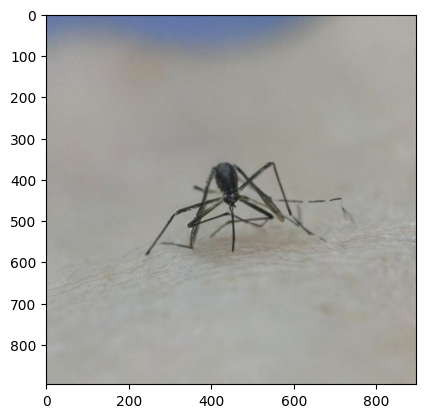

In [25]:
import matplotlib.pyplot as plt

%matplotlib inline 

plt.imshow(image)

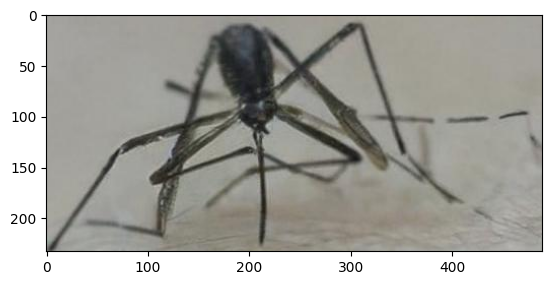

In [26]:
a = np.array(image)[int(boxes[1]):int(boxes[3]), int(boxes[0]):int(boxes[2])]

plt.imshow(a)

# Color Correction

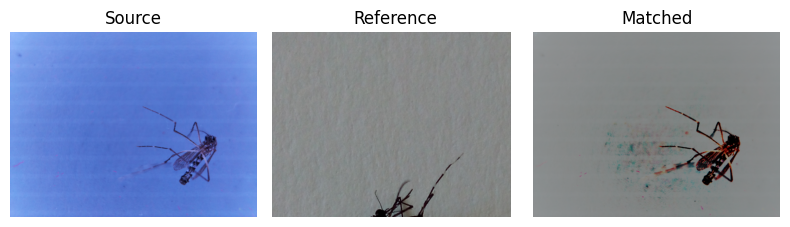

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
from skimage.exposure import match_histograms
from PIL import Image

%matplotlib inline 

source_path = '../mosqutio_kaggle/aegypti_0/aegypti1b.jpg'
reference_path = '../data_round_2/final/train_00010.jpeg'

reference = np.array(Image.open(reference_path).convert("RGB"), dtype=np.uint8)
image = np.array(Image.open(source_path).convert("RGB"), dtype=np.uint8)
matched = match_histograms(image, reference, channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

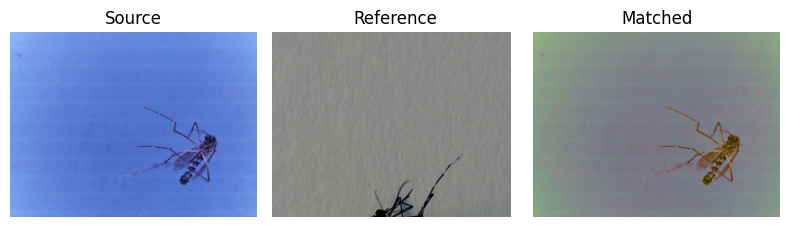

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def image_stats(image):
	# compute the mean and standard deviation of each channel
	(l, a, b) = cv2.split(image)
	(lMean, lStd) = (l.mean(), l.std())
	(aMean, aStd) = (a.mean(), a.std())
	(bMean, bStd) = (b.mean(), b.std())
	# return the color statistics
	return (lMean, lStd, aMean, aStd, bMean, bStd)
    
def match_histograms(source, target):
	# convert the images from the RGB to L*ab* color space, being
	# sure to utilizing the floating point data type (note: OpenCV
	# expects floats to be 32-bit, so use that instead of 64-bit)
	source = cv2.cvtColor(source, cv2.COLOR_BGR2LAB).astype("float32")
	target = cv2.cvtColor(target, cv2.COLOR_BGR2LAB).astype("float32")
	# compute color statistics for the source and target images
	(lMeanSrc, lStdSrc, aMeanSrc, aStdSrc, bMeanSrc, bStdSrc) = image_stats(source)
	(lMeanTar, lStdTar, aMeanTar, aStdTar, bMeanTar, bStdTar) = image_stats(target)
	# subtract the means from the target image
	(l, a, b) = cv2.split(target)
	l -= lMeanTar
	a -= aMeanTar
	b -= bMeanTar
	# scale by the standard deviations
	l = (lStdTar / lStdSrc) * l
	a = (aStdTar / aStdSrc) * a
	b = (bStdTar / bStdSrc) * b
	# add in the source mean
	l += lMeanSrc
	a += aMeanSrc
	b += bMeanSrc
	# clip the pixel intensities to [0, 255] if they fall outside
	# this range
	l = np.clip(l, 0, 255)
	a = np.clip(a, 0, 255)
	b = np.clip(b, 0, 255)
	# merge the channels together and convert back to the RGB color
	# space, being sure to utilize the 8-bit unsigned integer data
	# type
	transfer = cv2.merge([l, a, b])
	transfer = cv2.cvtColor(transfer.astype("uint8"), cv2.COLOR_LAB2RGB)
	
	# return the color transferred image
	return transfer


# Example usage
source_path = '../mosqutio_kaggle/aegypti_0/aegypti1b.jpg'
reference_path = '../data_round_2/final/train_00010.jpeg'

source = cv2.imread(source_path)
reference = cv2.imread(reference_path)

matched = match_histograms(reference, source)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

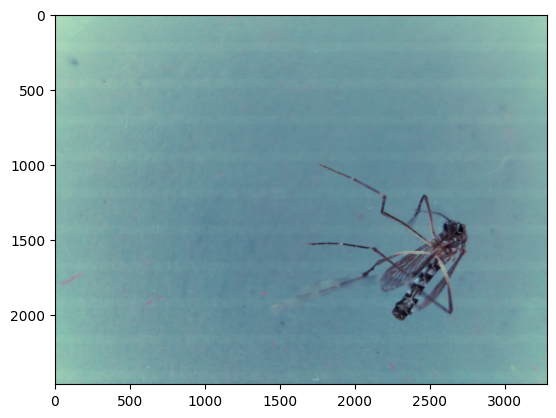

In [21]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline 

img_path = '../mosqutio_kaggle/aegypti_0/aegypti1b.jpg'

img = cv2.imread(img_path)
_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(float)
_img[:, :, 2] *= 0.75
_img[:, :, 1] *= 1.2
_img[:, :, 0] *= 1.2

plt.imshow(_img.astype(np.uint8))

# CLIP Zero Shot

In [1]:
from torch.utils.data import DataLoader
import pandas as pd
import torch as th 
import tqdm

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import PIL
import torchvision.transforms.functional as F
from torchvision.utils import make_grid
import torchvision.transforms as T


import src.zeroshot as lc
import src.data_loader as dl

%matplotlib inline  
%load_ext autoreload
%autoreload 2

In [2]:
PIL.Image.MAX_IMAGE_PIXELS = 108000001

def plot_confusion(y_t, y_p, labels):
    cm = confusion_matrix(y_t, y_p)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    
    
@th.no_grad()
def predict(model, data_loader):
    y_t, y_p = [], []
    
    for bs in tqdm.tqdm(data_loader):
        x = bs['img'].cuda()
        y_t.append(bs['label'].argmax(dim=1).detach().cpu().numpy())
        y_p.append(model(x).argmax(dim=1).detach().cpu().numpy())
        
    return np.concatenate(y_t), np.concatenate(y_p)

In [3]:
img_dir = "../data_round_2/final"
annotations_csv = "../data_round_2/phase2_train_v0.csv"

class_dict = {
    "albopictus": th.tensor([1, 0, 0, 0, 0, 0], dtype=th.float),
    "culex": th.tensor([0, 1, 0, 0, 0, 0], dtype=th.float),
    "japonicus/koreicus": th.tensor([0, 0, 1, 0, 0, 0], dtype=th.float),
    "culiseta": th.tensor([0, 0, 0, 1, 0, 0], dtype=th.float),
    "anopheles": th.tensor([0, 0, 0, 0, 1, 0], dtype=th.float),
    "aegypti": th.tensor([0, 0, 0, 0, 0, 1], dtype=th.float),
}

labels = list(class_dict.keys())
transform = dl.pre_process("")
bs = 256

In [15]:
model = lc.MosquitoZeroShotClassifier('ViT-B-32', 'laion2b_s34b_b79k', device='cuda')

In [16]:
next(model.model.visual.parameters()).is_cuda, \
next(model.model.transformer.parameters()).is_cuda, \
next(model.model.token_embedding.parameters()).is_cuda, \
next(model.model.ln_final.parameters()).is_cuda,

(True, True, True, True)

In [17]:
annotations_df = pd.read_csv(annotations_csv)
train_df, val_df = train_test_split(
    annotations_df,
    test_size=0.2,
    stratify=annotations_df["class_label"],
    random_state=200,
)

val_df = val_df[val_df['img_fName'].str.contains(r"train_\d+.jpeg")]

#annotations_df = pd.read_csv(annotations_csv)
#train_df = annotations_df.sample(frac=0.8, random_state=200)
#val_df = annotations_df.drop(train_df.index)

train_dataset = dl.SimpleClassificationDataset(
    train_df,
    img_dir,
    class_dict,
    transform,
    dl.aug("resize"),
    class_balance=False,
)
train_dataloader = DataLoader(
    train_dataset,
    batch_size=bs,
    shuffle=False,
    num_workers=6,
)

val_dataset = dl.SimpleClassificationDataset(
    val_df,
    img_dir,
    class_dict,
    transform,
    dl.aug("resize"),
    class_balance=False,
)
val_dataloader = DataLoader(
    val_dataset,
    batch_size=bs,
    shuffle=False,
    num_workers=6,
)

In [18]:
v_t, v_p = predict(model, val_dataloader)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:33<00:00,  3.68s/it]


0.10929031351252395

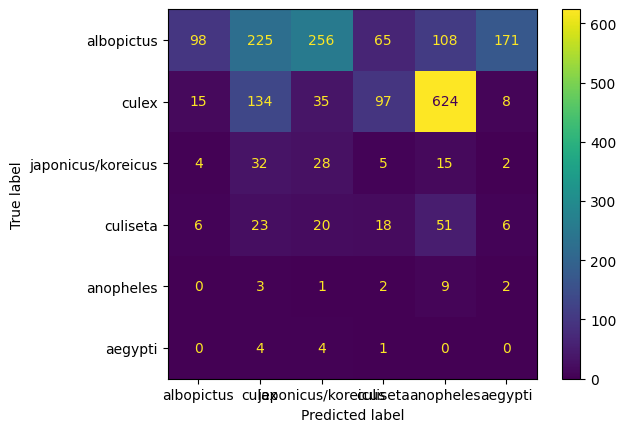

In [19]:
plot_confusion(v_t, v_p, labels)
f1_score(v_t, v_p, average='macro')

100%|██████████████████████████████████████████████████████████████████████████████████████████| 33/33 [01:42<00:00,  3.11s/it]


0.09685070503099273

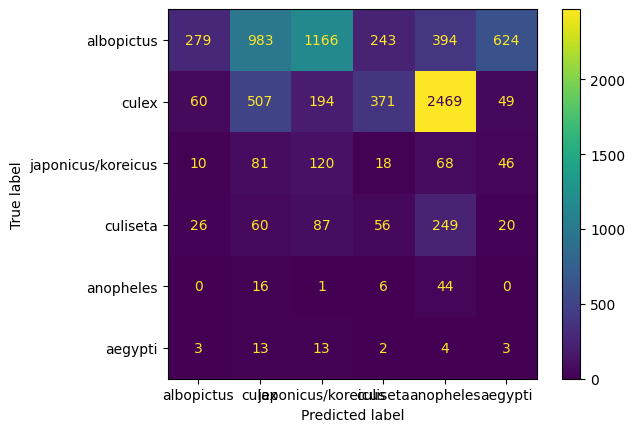

In [20]:
t_t, t_p = predict(model, train_dataloader)
plot_confusion(t_t, t_p, labels)

f1_score(t_t, t_p, average='macro')

# YOLO and OWL-ViT Check Annotation Quality

In [1]:
import os 
import json
import copy

from tqdm import tqdm
import pandas as pd
from ultralytics import YOLO
from PIL import Image, ImageDraw
import PIL
from transformers import OwlViTProcessor, OwlViTForObjectDetection
import torch
import numpy as np
import matplotlib.pyplot as plt

PIL.Image.MAX_IMAGE_PIXELS = 108000001

%matplotlib inline  
%load_ext autoreload
%autoreload 2

In [2]:
img_dir = "../data_round_2/final"
annotations_csv = "../data_round_2/phase2_train_v0.csv"
yolo_path = 'yolo/runs/detect/two_class/weights/best.pt'

In [3]:
det = YOLO(yolo_path, task="detect")
df = pd.read_csv(annotations_csv)

owl_processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32", cache_dir='models/owl/')
owl_model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32", cache_dir='models/owl/').cuda()

In [4]:
def nms_pytorch(P : torch.tensor ,thresh_iou : float):
    """
    Apply non-maximum suppression to avoid detecting too many
    overlapping bounding boxes for a given object.
    Args:
        boxes: (tensor) The location preds for the image 
            along with the class predscores, Shape: [num_boxes,5].
        thresh_iou: (float) The overlap thresh for suppressing unnecessary boxes.
    Returns:
        A list of filtered boxes, Shape: [ , 5]

    Not smart so copy paste:
        https://learnopencv.com/non-maximum-suppression-theory-and-implementation-in-pytorch/
    """
 
    # we extract coordinates for every 
    # prediction box present in P
    x1 = P[:, 0]
    y1 = P[:, 1]
    x2 = P[:, 2]
    y2 = P[:, 3]
 
    # we extract the confidence scores as well
    scores = P[:, 4]
 
    # calculate area of every block in P
    areas = (x2 - x1) * (y2 - y1)
     
    # sort the prediction boxes in P
    # according to their confidence scores
    order = scores.argsort()
 
    # initialise an empty list for 
    # filtered prediction boxes
    keep = []
     
 
    while len(order) > 0:
         
        # extract the index of the 
        # prediction with highest score
        # we call this prediction S
        idx = order[-1]
 
        # push S in filtered predictions list
        keep.append(P[idx])
 
        # remove S from P
        order = order[:-1]
 
        # sanity check
        if len(order) == 0:
            break
         
        # select coordinates of BBoxes according to 
        # the indices in order
        xx1 = torch.index_select(x1,dim = 0, index = order)
        xx2 = torch.index_select(x2,dim = 0, index = order)
        yy1 = torch.index_select(y1,dim = 0, index = order)
        yy2 = torch.index_select(y2,dim = 0, index = order)
 
        # find the coordinates of the intersection boxes
        xx1 = torch.max(xx1, x1[idx])
        yy1 = torch.max(yy1, y1[idx])
        xx2 = torch.min(xx2, x2[idx])
        yy2 = torch.min(yy2, y2[idx])
 
        # find height and width of the intersection boxes
        w = xx2 - xx1
        h = yy2 - yy1
         
        # take max with 0.0 to avoid negative w and h
        # due to non-overlapping boxes
        w = torch.clamp(w, min=0.0)
        h = torch.clamp(h, min=0.0)
 
        # find the intersection area
        inter = w*h
 
        # find the areas of BBoxes according the indices in order
        rem_areas = torch.index_select(areas, dim = 0, index = order) 
 
        # find the union of every prediction T in P
        # with the prediction S
        # Note that areas[idx] represents area of S
        union = (rem_areas - inter) + areas[idx]
         
        # find the IoU of every prediction in P with S
        IoU = inter / union
 
        # keep the boxes with IoU less than thresh_iou
        mask = IoU < thresh_iou
        order = order[mask]


    boxes = [k.numpy().tolist()[:4] for k in keep]
    scores = [k.numpy().tolist()[-1] for k in keep]
    return boxes, scores

In [5]:
@torch.no_grad()
def owl_detect_images(img_path, t=0.5):
    image = Image.open(os.path.join(img_dir, img_path)).convert("RGB")
    texts = [["a photo of a mosquito"]]
    inputs = owl_processor(text=texts, images=image, return_tensors="pt").to('cuda')
    outputs = owl_model(**inputs)
    target_sizes = torch.Tensor([image.size[::-1]]).to('cuda')
    results = owl_processor.post_process_object_detection(outputs=outputs, 
                                                          target_sizes=target_sizes, 
                                                          threshold=0.1)
    boxes, scores = results[0]["boxes"].cpu().detach(), results[0]["scores"].cpu().detach()
    #print('Before nms: ', len(boxes))

    P = torch.cat((boxes, torch.unsqueeze(scores, 1)), 1)
    boxes, scores = nms_pytorch(P, t)
    #print('After nms: ', len(boxes))

    return boxes, scores

    
def detect_images(img_path, t_iou=0.5, t_conf=0.5):
    results = det(os.path.join(img_dir, img_path), verbose=True, iou=t_iou) 

    bboxes = []
    confs = []

    for result in results:
        _bboxes = result.boxes.xyxy.tolist()
        _confs = result.boxes.conf.tolist()

        for bbox, conf in zip(_bboxes, _confs):
            if conf > t_conf:
                bboxes.append(bbox)
                confs.append(conf)
                
    return bboxes, confs


def iou(box1, box2):
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    dif_x = (min(box1[2], box2[2]) - max(box1[0], box2[0]))
    dif_y = (min(box1[3], box2[3]) - max(box1[1], box2[1]))
    
    inter = dif_x * dif_y
    
    if dif_x < 0 or dif_y < 0:
        return 0
    return inter / (area1 + area2 - inter)

def plot_image(img_path, bboxes, true_box=[], plot=True, save_dir='examples'):
    img = Image.open(os.path.join(img_dir, img_path)).convert("RGB")
    img_ = ImageDraw.Draw(img)  
    
    for bbox in bboxes:    
        img_.rectangle(bbox, fill=None, outline="blue", width=int(0.005*max(img.size)))

    if true_box:
        img_.rectangle(true_box, fill=None, outline="green", width=int(0.005*max(img.size)))

    

    if plot:
        plt.imshow(img)
    else:
        os.makedirs(save_dir, exist_ok=True)
        img.save(os.path.join(save_dir, img_path))

In [6]:
# find all the annotations 
annotations_owl_path = 'annoations_owl.json'

if not os.path.exists(annotations_owl_path):
    data = {}
    
    for img_path in tqdm(df.img_fName):
        #boxes, scores = owl_detect_images(img_path, t=0.4)
        boxes, scores = owl_detect_images(img_path, t=0.1) # this should be equivalent
        data[img_path] = boxes

    with open(annotations_owl_path, 'w') as f:
        json.dump(data, f, indent=4)
else:
    data = json.load(open(annotations_owl_path))

In [107]:
# do again so I don't run 20 min of owl guy

for key, boxes in data.items():
    if len(boxes) > 1:
        P = torch.tensor([box + [len(boxes) - i] for i, box in enumerate(boxes)])
        boxes, _ = nms_pytorch(P, 0.1)
        data[key] = boxes

In [7]:
# find bad annotations

def find_bad_annotations(df, data, t=0.1):
    bad_annotations = []


    for img_name, pred_boxes in tqdm(data.items()):
        # god i am bad at pandas
        true_box = df[df.img_fName == img_name].values.tolist()[0][3:7]

        good_annotation = False
        for pred_box in pred_boxes:
            if iou(true_box, pred_box) > t:
                good_annotation = True
                break

        if not good_annotation:
            bad_annotations.append(img_name)

    return bad_annotations


bad_annotations = find_bad_annotations(df, data)

100%|███████████████████████████████████████████████████████████████████████████████████████████| 10357/10357 [00:04<00:00, 2151.98it/s]


In [8]:
len(bad_annotations), len(data)

(318, 10357)

In [9]:
for img_name in tqdm(bad_annotations):
    boxes = data[img_name]
    if boxes:
        true_box = df[df.img_fName == img_name].values.tolist()[0][3:7]
        plot_image(img_name, boxes, true_box, False, 'examples_failed_cases')


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 318/318 [00:01<00:00, 227.79it/s]


In [10]:
owl_better_single = [
    "train_03703.jpeg",
    "train_04702.jpeg", # combine owl and original annotations
    "train_05448.jpeg",
    "train_06174.jpeg",
    "train_06701.jpeg",
    "train_06737.jpeg",
    "train_06916.jpeg",
    "train_06988.jpeg",
    "train_07191.jpeg",
    "train_07228.jpeg",
    "train_07246.jpeg",
    "train_07364.jpeg",
    "train_07395.jpeg",
    "train_07454.jpeg",
    "train_07512.jpeg",
    "train_07550.jpeg",
    "train_07979.jpeg",
    "train_08201.jpeg",
    "train_08222.jpeg",
    "train_08306.jpeg",
    "train_08553.jpeg",
    "train_08742.jpeg",
    "train_08804.jpeg", # combine owl and original bbox
    "train_08845.jpeg",
    "train_08904.jpeg",
    "train_09022.jpeg",
    "train_09150.jpeg",
    "train_09330.jpeg",
    "train_09453.jpeg",
    "train_09825.jpeg",
    "train_10018.jpeg",
    "train_10156.jpeg",
    "train_10160.jpeg",
    "train_10209.jpeg",
    "train_10213.jpeg"
]

len(owl_better_single)

35

In [11]:
# show images with multiple detection
data_multiple = {}
for k, v in data.items():
    if len(v) > 1:
        data_multiple[k] = v
len(data_multiple)

386

In [12]:
for img_name, boxes in tqdm(data_multiple.items()):
    true_box = df[df.img_fName == img_name].values.tolist()[0][3:7]
    plot_image(img_name, boxes, true_box, False, 'example_multiple_annotations')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 386/386 [00:16<00:00, 23.27it/s]


In [13]:
owl_better = [
    "train_00719.jpeg",
    "train_00784.jpeg", # remove the one on the most bottom
    "train_00813.jpeg",
    "train_01606.jpeg",
    "train_01705.jpeg",
    "train_01981.jpeg",
    "train_02595.jpeg",
    "train_03039.jpeg",
    "train_03238.jpeg",
    "train_03314.jpeg",
    "train_03359.jpeg",
    "train_03804.jpeg",
    "train_04132.jpeg",
    "train_04331.jpeg",
    "train_04368.jpeg",
    "train_04420.jpeg",
    "train_04570.jpeg",
    "train_04661.jpeg",
    "train_05450.jpeg",
    "train_06233.jpeg",
    "train_06445.jpeg", # remove the one on the most bottom left
    "train_06617.jpeg",
    "train_06809.jpeg",
    "train_06860.jpeg",
    "train_06903.jpeg",
    "train_06945.jpeg",
    "train_06958.jpeg",
    "train_06980.jpeg",
    "train_07008.jpeg",
    "train_07017.jpeg",
    "train_07021.jpeg",
    "train_07035.jpeg",
    "train_07085.jpeg",
    "train_07113.jpeg",
    "train_07137.jpeg",
    "train_07159.jpeg",
    "train_07196.jpeg",
    "train_07211.jpeg",
    "train_07239.jpeg",
    "train_07241.jpeg",
    "train_07286.jpeg",
    "train_07334.jpeg", # remove the smallest
    "train_07422.jpeg",
    "train_07448.jpeg",
    "train_07479.jpeg",
    "train_07512.jpeg",
    "train_07554.jpeg", # remove the smallest
    "train_07605.jpeg",
    "train_07650.jpeg",
    "train_07673.jpeg",
    "train_07680.jpeg", # remove the smallest
    "train_07720.jpeg",
    "train_07773.jpeg",
    "train_07811.jpeg", # remove the box the one on the most bottom
    "train_07832.jpeg",
    "train_07855.jpeg",
    "train_07901.jpeg",
    "train_08060.jpeg",
    "train_08084.jpeg",
    "train_08094.jpeg", # remove the smallest bbox
    "train_08236.jpeg", # one extra box the one on the right most
    "train_08250.jpeg",
    "train_08325.jpeg",
    "train_08332.jpeg",
    "train_08362.jpeg",
    "train_08407.jpeg",
    "train_08519.jpeg",
    "train_08622.jpeg",
    "train_08696.jpeg",
    "train_08739.jpeg",
    "train_08742.jpeg",
    "train_08760.jpeg",
    "train_08832.jpeg",
    "train_08891.jpeg",
    "train_08895.jpeg",
    "train_09006.jpeg",
    "train_09021.jpeg",
    "train_09078.jpeg",
    "train_09111.jpeg",
    "train_09152.jpeg",
    "train_09186.jpeg",
    "train_09232.jpeg",
    "train_09247.jpeg",
    "train_09266.jpeg",
    "train_09316.jpeg",
    "train_09326.jpeg",
    "train_09363.jpeg",
    "train_09370.jpeg",
    "train_09375.jpeg",
    "train_09480.jpeg",
    "train_09527.jpeg",
    "train_09571.jpeg",
    "train_09585.jpeg",
    "train_09619.jpeg",
    "train_09675.jpeg",
    "train_09721.jpeg",
    "train_09733.jpeg",
    "train_09754.jpeg",
    "train_09760.jpeg",
    "train_09787.jpeg",
    "train_09825.jpeg",
    "train_09828.jpeg",
    "train_09867.jpeg",
    "train_09938.jpeg",
    "train_09947.jpeg", # remove the biggest box
    "train_09970.jpeg", # remove the biggest box
    "train_10015.jpeg",
    "train_10069.jpeg",
    "train_10084.jpeg",
    "train_10114.jpeg",
    "train_10162.jpeg",
    "train_10224.jpeg",
    "train_10245.jpeg", # one extra box the one on the right most
    "train_10257.jpeg",
    "train_10298.jpeg",
]

len(owl_better)

115

In [14]:
def filter(boxes, true_boxes, img_path):
    # remove biggest
    if img_path in ["train_09947.jpeg", "train_09970.jpeg"]:
        area = 0
        i_m = -1
        for i, box in enumerate(boxes):
            _area = (box[2] - box[0]) * (box[3] - box[1])
            if area < _area:
                i_m = i
                area = _area
        if i_m > 0:
            boxes.pop(i_m)
        return boxes
    # remove smallest
    elif img_path in ["train_07680.jpeg", "train_07554.jpeg", "train_07334.jpeg"]:
        area = 1e10
        i_m = -1
        for i, box in enumerate(boxes):
            _area = (box[2] - box[0]) * (box[3] - box[1])
            if area > _area:
                i_m = i
                area = _area
        if i_m > 0:
            boxes.pop(i_m)
        return boxes
    # remove the right most
    elif img_path in ["train_08236.jpeg", "train_07811.jpeg"]:
        right = 0
        i_m = -1
        for i, box in enumerate(boxes):
            _right = box[0]
            if right < _right:
                i_m = i
                right = _right
        if i_m > 0:
            boxes.pop(i_m)
        return boxes
    # bottom
    elif img_path in ["train_00784.jpeg", "train_06445.jpeg", "train_07811.jpeg"]:
        bottom = 0
        i_m = -1
        for i, box in enumerate(boxes):
            _bottom = box[1]
            if bottom < _bottom:
                i_m = i
                bottom = _bottom
        if i_m > 0:
            boxes.pop(i_m)
        return boxes
    # merge both
    elif img_path == "train_04702.jpeg":
        boxes.append(true_boxes)
        return boxes
    # merge boxes
    elif img_path == "train_08804.jpeg":
        box = boxes[0]
        return [[min(box[0], true_boxes[0]), min(box[1], true_boxes[1]), max(box[2], true_boxes[2]), max(box[3], true_boxes[3])]]
    return boxes

In [15]:

good_annotations = list(set(owl_better_single + owl_better))
df_dict = dict(
    (d['img_fName'], [d])for d in df.to_dict('records')
)


for img_path in good_annotations:
    # merge data with df
    boxes = data[img_path]
    true_boxes = [
        df_dict[img_path][0]['bbx_xtl'], 
        df_dict[img_path][0]['bbx_ytl'], 
        df_dict[img_path][0]['bbx_xbr'], 
        df_dict[img_path][0]['bbx_ybr']
    ]
    boxes = filter(boxes, true_boxes, img_path)

    new_annotations = []
    for box in boxes:
        annot = copy.deepcopy(df_dict[img_path][0])
        annot['bbx_xtl'] = int(box[0])
        annot['bbx_ytl'] = int(box[1])
        annot['bbx_xbr'] = int(box[2])
        annot['bbx_ybr'] = int(box[3])
        new_annotations.append(annot)

    df_dict[img_path] = new_annotations
        

In [16]:
df_list = []
for _, annotations in df_dict.items():
    df_list.extend(annotations)
len(df_list), len(df), len(df_list) - len(df)

(10576, 10357, 219)

In [17]:
clean_df = pd.DataFrame(df_list)
clean_df.to_csv("../data_round_2/phase2_train_v0_cleaned.csv", index=False)

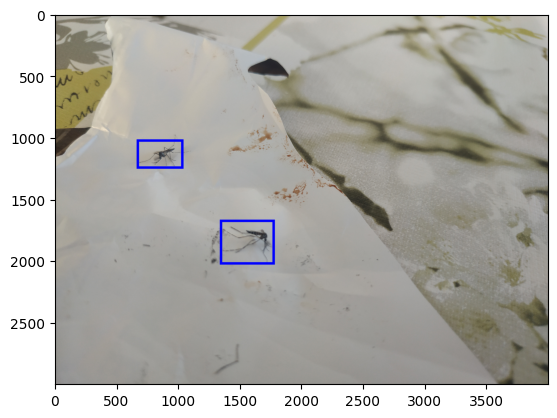

In [18]:
# some testing
img_path = 'train_04702.jpeg'

boxes = []
for annot in df_dict[img_path]:
    boxes.append( [
       annot['bbx_xtl'], 
       annot['bbx_ytl'], 
       annot['bbx_xbr'], 
       annot['bbx_ybr']
    ])

plot_image(img_path, boxes)

In [19]:
clean_df

,img_fName,img_w,img_h,bbx_xtl,bbx_ytl,bbx_xbr,bbx_ybr,class_label
0,train_00000.jpeg,2448,3264,1301,1546,1641,2096,albopictus
1,train_00001.jpeg,3024,4032,900,1897,1950,2990,albopictus
2,train_00002.jpeg,768,1024,220,58,659,808,albopictus
3,train_00003.jpeg,3456,4608,1169,2364,1586,2826,albopictus
4,train_00004.jpeg,1024,1365,129,231,697,1007,culex
...,...,...,...,...,...,...,...,...
10571,train_10352.jpeg,2064,1376,0,139,1344,1253,albopictus
10572,train_10353.jpeg,2664,3996,821,1481,1564,2706,albopictus
10573,train_10354.jpeg,1157,1157,367,315,676,764,albopictus
10574,train_10355.jpeg,3000,4000,1064,2463,1442,2917,albopictus


In [20]:
v, cc= np.unique(df['class_label'].values, return_counts=True)

In [21]:
v, c = np.unique(clean_df['class_label'].values, return_counts=True)

In [22]:
for label, new_elements in zip(v, c - cc):
    print(f'{label:<18} {str(new_elements):<3} new boxes are added.')

aegypti            1   new boxes are added.
albopictus         109 new boxes are added.
anopheles          2   new boxes are added.
culex              96  new boxes are added.
culiseta           10  new boxes are added.
japonicus/koreicus 1   new boxes are added.


# Split Datset

In [27]:
len(set(df_groupped['img_fName'])) == len(df_groupped['img_fName'])

False

In [29]:
for img_fName in set(df_groupped['img_fName']):
    rows = df_groupped[df_groupped.img_fName == img_fName]
    if len(rows) > 2:
        print(rows)
        break

                              img_fName  img_w  img_h  bbx_xtl  bbx_ytl  \
img_fName                                                                 
train_08519.jpeg 8623  train_08519.jpeg    768   1024      418      219   
                 8624  train_08519.jpeg    768   1024      215      532   
                 8625  train_08519.jpeg    768   1024      133      215   
                 8626  train_08519.jpeg    768   1024      182       67   

                       bbx_xbr  bbx_ybr class_label  
img_fName                                            
train_08519.jpeg 8623      643      450       culex  
                 8624      528      952       culex  
                 8625      295      365       culex  
                 8626      385      242       culex  


In [26]:
import pandas as pd

df = pd.read_csv('../data_round_2/phase2_train_v0_cleaned.csv')

df_groupped = df.groupby('img_fName', group_keys=True).apply(lambda x: x)


In [16]:
import pandas as pd

genus = ['anopheles', 'aegypti', 'culex']

df = pd.read_csv('../data_round_2/phase2_train_v0.csv')

df_genus = df[
    (df.class_label == 'anopheles') |
    (df.class_label == 'culiseta') |
    (df.class_label == 'culex') 
]
df_genus.to_csv('../data_round_2/genus_only.csv', index=False)

df_species = df[
    (df.class_label == 'albopictus') |
    (df.class_label == 'japonicus/koreicus') |
    (df.class_label == 'aegypti') 
]
df_species.to_csv('../data_round_2/species_only.csv', index=False)


len(df), len(df_genus), len(df_species)

(10357, 5269, 5088)

In [18]:
df_genus.class_label.unique()

array(['culex', 'anopheles', 'culiseta'], dtype=object)

In [17]:
df_species.class_label.unique()

array(['albopictus', 'japonicus/koreicus', 'aegypti'], dtype=object)

In [11]:
a = set()
a.add([1])
a

TypeError: unhashable type: 'list'

# YOLO Experiment

In [8]:
!yolo train data=yolo_config_mos_two_class.yml model=yolov8s.pt epochs=100 imgsz=640

New https://pypi.org/project/ultralytics/8.0.176 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.163 🚀 Python-3.9.17 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=yolo_config_mos_two_class.yml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnos

In [6]:
!yolo --help

WARNING ⚠️ '--help' does not require leading dashes '--', updating to 'help'.

    Arguments received: ['yolo', '--help']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco128.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolov8n-seg.pt source='https://youtu.be/Zgi9g1ksQHc' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and 

In [1]:
import open_clip

open_clip.list_pretrained()


[('RN50', 'openai'),
 ('RN50', 'yfcc15m'),
 ('RN50', 'cc12m'),
 ('RN50-quickgelu', 'openai'),
 ('RN50-quickgelu', 'yfcc15m'),
 ('RN50-quickgelu', 'cc12m'),
 ('RN101', 'openai'),
 ('RN101', 'yfcc15m'),
 ('RN101-quickgelu', 'openai'),
 ('RN101-quickgelu', 'yfcc15m'),
 ('RN50x4', 'openai'),
 ('RN50x16', 'openai'),
 ('RN50x64', 'openai'),
 ('ViT-B-32', 'openai'),
 ('ViT-B-32', 'laion400m_e31'),
 ('ViT-B-32', 'laion400m_e32'),
 ('ViT-B-32', 'laion2b_e16'),
 ('ViT-B-32', 'laion2b_s34b_b79k'),
 ('ViT-B-32', 'datacomp_m_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_clip_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_laion_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_image_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_text_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_basic_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_s128m_b4k'),
 ('ViT-B-32', 'datacomp_s_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_clip_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_laion_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_image_s13m_b4k'),
 ('ViT-B-32', 'commo

In [6]:
data = None
model_name = 'convnext_large_d'
model = open_clip.create_model_and_transforms(
                model_name, pretrained=data
            )[0].visual
model

TimmModel(
  (trunk): ConvNeXt(
    (stem): Sequential(
      (0): Conv2d(3, 192, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((192,), eps=1e-06, elementwise_affine=True)
    )
    (stages): Sequential(
      (0): ConvNeXtStage(
        (downsample): Identity()
        (blocks): Sequential(
          (0): ConvNeXtBlock(
            (conv_dw): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192)
            (norm): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
            (mlp): Mlp(
              (fc1): Linear(in_features=192, out_features=768, bias=True)
              (act): GELU()
              (drop1): Dropout(p=0.0, inplace=False)
              (norm): Identity()
              (fc2): Linear(in_features=768, out_features=192, bias=True)
              (drop2): Dropout(p=0.0, inplace=False)
            )
            (shortcut): Identity()
            (drop_path): Identity()
          )
          (1): ConvNeXtBlock(
            (conv_dw):

In [7]:
for name, m in model.named_modules():
    print(name)


trunk
trunk.stem
trunk.stem.0
trunk.stem.1
trunk.stages
trunk.stages.0
trunk.stages.0.downsample
trunk.stages.0.blocks
trunk.stages.0.blocks.0
trunk.stages.0.blocks.0.conv_dw
trunk.stages.0.blocks.0.norm
trunk.stages.0.blocks.0.mlp
trunk.stages.0.blocks.0.mlp.fc1
trunk.stages.0.blocks.0.mlp.act
trunk.stages.0.blocks.0.mlp.drop1
trunk.stages.0.blocks.0.mlp.norm
trunk.stages.0.blocks.0.mlp.fc2
trunk.stages.0.blocks.0.mlp.drop2
trunk.stages.0.blocks.0.shortcut
trunk.stages.0.blocks.0.drop_path
trunk.stages.0.blocks.1
trunk.stages.0.blocks.1.conv_dw
trunk.stages.0.blocks.1.norm
trunk.stages.0.blocks.1.mlp
trunk.stages.0.blocks.1.mlp.fc1
trunk.stages.0.blocks.1.mlp.act
trunk.stages.0.blocks.1.mlp.drop1
trunk.stages.0.blocks.1.mlp.norm
trunk.stages.0.blocks.1.mlp.fc2
trunk.stages.0.blocks.1.mlp.drop2
trunk.stages.0.blocks.1.shortcut
trunk.stages.0.blocks.1.drop_path
trunk.stages.0.blocks.2
trunk.stages.0.blocks.2.conv_dw
trunk.stages.0.blocks.2.norm
trunk.stages.0.blocks.2.mlp
trunk.stages.

In [8]:
import src.convnext_meta as cm


model = cm.convnext_xlarge(in_22k=True)

In [10]:
model.head

Linear(in_features=2048, out_features=1000, bias=True)

In [9]:
for name, m in model.named_modules():
    print(name)


downsample_layers
downsample_layers.0
downsample_layers.0.0
downsample_layers.0.1
downsample_layers.1
downsample_layers.1.0
downsample_layers.1.1
downsample_layers.2
downsample_layers.2.0
downsample_layers.2.1
downsample_layers.3
downsample_layers.3.0
downsample_layers.3.1
stages
stages.0
stages.0.0
stages.0.0.dwconv
stages.0.0.norm
stages.0.0.pwconv1
stages.0.0.act
stages.0.0.pwconv2
stages.0.0.drop_path
stages.0.1
stages.0.1.dwconv
stages.0.1.norm
stages.0.1.pwconv1
stages.0.1.act
stages.0.1.pwconv2
stages.0.1.drop_path
stages.0.2
stages.0.2.dwconv
stages.0.2.norm
stages.0.2.pwconv1
stages.0.2.act
stages.0.2.pwconv2
stages.0.2.drop_path
stages.1
stages.1.0
stages.1.0.dwconv
stages.1.0.norm
stages.1.0.pwconv1
stages.1.0.act
stages.1.0.pwconv2
stages.1.0.drop_path
stages.1.1
stages.1.1.dwconv
stages.1.1.norm
stages.1.1.pwconv1
stages.1.1.act
stages.1.1.pwconv2
stages.1.1.drop_path
stages.1.2
stages.1.2.dwconv
stages.1.2.norm
stages.1.2.pwconv1
stages.1.2.act
stages.1.2.pwconv2
stages.

In [7]:
import torch

x = torch.rand(1, 3, 224, 224)

a = model(x)

In [8]:
a.shape

torch.Size([1, 768])

In [1]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline 



In [4]:

id = 0
annotation = f'../data_yolo/labels/train/{id}.txt'
img = f'../data_yolo/images/train/{id}.jpeg'

im = cv2.imread(img)
img_w, img_h = im.shape[:1]
an = [int(a) for a in open(annotation, 'r').read().split(' ')[1:]]
an[0] *= img_w
an[1] *= img_h
an[2] *= img_w
an[3] *= img_h



[940, 1757, 1401, 2342]

In [6]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold


annotations_csv = "../data_round_2/phase2_train_v0.csv"
X = pd.read_csv(annotations_csv)
y = X.class_label

skf = StratifiedKFold(n_splits=5)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    df = X.iloc[train_index]
    print(df.head())

             img_fName  img_w  img_h  bbx_xtl  bbx_ytl  bbx_xbr  bbx_ybr  \
2029  train_02029.jpeg    768   1024      254      264      398      429   
2030  train_02030.jpeg    768   1024      205      262      744      730   
2032  train_02032.jpeg    768   1024      323      416      451      522   
2033  train_02033.jpeg   1174   1211      645      532     1090      943   
2034  train_02034.jpeg    768   1024      247      459      449      684   

     class_label  
2029       culex  
2030       culex  
2032       culex  
2033       culex  
2034       culex  
          img_fName  img_w  img_h  bbx_xtl  bbx_ytl  bbx_xbr  bbx_ybr  \
0  train_00000.jpeg   2448   3264     1301     1546     1641     2096   
1  train_00001.jpeg   3024   4032      900     1897     1950     2990   
2  train_00002.jpeg    768   1024      220       58      659      808   
3  train_00003.jpeg   3456   4608     1169     2364     1586     2826   
4  train_00004.jpeg   1024   1365      129      231      697    

In [2]:
y

0        albopictus
1        albopictus
2        albopictus
3        albopictus
4             culex
            ...    
10352    albopictus
10353    albopictus
10354    albopictus
10355    albopictus
10356         culex
Name: class_label, Length: 10357, dtype: object

In [2]:
from types import SimpleNamespace
import os
import pandas as pd
from clip_zero_shot_mosquito import  ZeroShot

img_dir = '../data/train'
annotation_csv = '../data/train.csv'
df = pd.read_csv(annotation_csv)
clip_params = SimpleNamespace(model_name='ViT-B-32', dataset='laion2b_s34b_b79k')


train_df = df.sample(frac=0.8, random_state=200)
val_df = df.drop(train_df.index)


zs = ZeroShot(img_dir, train_df, clip_params)
zs.index()



INFO:root:Loaded ViT-B-32 model config.
INFO:root:Loading pretrained ViT-B-32 weights (laion2b_s34b_b79k).
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [02:20<00:00, 10.83s/it]


In [2]:
from types import SimpleNamespace
import os
import pandas as pd
from clip_zero_shot_mosquito import  ZeroShot

img_dir = '../data/train'
annotation_csv = '../data/train.csv'
df = pd.read_csv(annotation_csv)
clip_params = SimpleNamespace(model_name='ViT-B-32', dataset='laion2b_s34b_b79k')


train_df = df.sample(frac=0.8, random_state=200)
val_df = df.drop(train_df.index)


zs = ZeroShot(img_dir, train_df, clip_params)
zs.index()



INFO:root:Loaded ViT-B-32 model config.
INFO:root:Loading pretrained ViT-B-32 weights (laion2b_s34b_b79k).
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [02:20<00:00, 10.83s/it]


In [1]:
import open_clip

open_clip.list_pretrained()

[('RN50', 'openai'),
 ('RN50', 'yfcc15m'),
 ('RN50', 'cc12m'),
 ('RN50-quickgelu', 'openai'),
 ('RN50-quickgelu', 'yfcc15m'),
 ('RN50-quickgelu', 'cc12m'),
 ('RN101', 'openai'),
 ('RN101', 'yfcc15m'),
 ('RN101-quickgelu', 'openai'),
 ('RN101-quickgelu', 'yfcc15m'),
 ('RN50x4', 'openai'),
 ('RN50x16', 'openai'),
 ('RN50x64', 'openai'),
 ('ViT-B-32', 'openai'),
 ('ViT-B-32', 'laion400m_e31'),
 ('ViT-B-32', 'laion400m_e32'),
 ('ViT-B-32', 'laion2b_e16'),
 ('ViT-B-32', 'laion2b_s34b_b79k'),
 ('ViT-B-32', 'datacomp_m_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_clip_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_laion_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_image_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_text_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_basic_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_s128m_b4k'),
 ('ViT-B-32', 'datacomp_s_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_clip_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_laion_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_image_s13m_b4k'),
 ('ViT-B-32', 'commo

In [21]:
%load_ext autoreload
%autoreload 2

In [32]:

for _, row in val_df[['img_fName', 'class_label']].iterrows():
    f_name, label = row.img_fName, row.class_label
    img_path = os.path.join(img_dir, f_name)
    print('result', zs.search(img_path))
    print('label', label)
    print('--------------------')

[[0.6046905]] [[1072]]
result (7488    albopictus
Name: class_label, dtype: object, array([0.6046905], dtype=float32))
label albopictus
--------------------
[[0.650826]] [[134]]
result (6412    albopictus
Name: class_label, dtype: object, array([0.650826], dtype=float32))
label albopictus
--------------------
[[0.5294647]] [[5326]]
result (5317    culex
Name: class_label, dtype: object, array([0.5294647], dtype=float32))
label culex
--------------------
[[0.5989852]] [[1079]]
result (5672    albopictus
Name: class_label, dtype: object, array([0.5989852], dtype=float32))
label albopictus
--------------------
[[0.57310104]] [[3421]]
result (7580    culex
Name: class_label, dtype: object, array([0.57310104], dtype=float32))
label culex
--------------------
[[0.6220788]] [[6117]]
result (3044    culex
Name: class_label, dtype: object, array([0.6220788], dtype=float32))
label culex
--------------------
[[0.62988174]] [[848]]
result (4107    culex
Name: class_label, dtype: object, array([0.6

[[0.7485043]] [[2179]]
result (5185    albopictus
Name: class_label, dtype: object, array([0.7485043], dtype=float32))
label albopictus
--------------------
[[0.5348603]] [[3345]]
result (787    culex
Name: class_label, dtype: object, array([0.5348603], dtype=float32))
label culex
--------------------
[[0.6395749]] [[1900]]
result (3412    culex
Name: class_label, dtype: object, array([0.6395749], dtype=float32))
label albopictus
--------------------
[[0.50522053]] [[528]]
result (7623    albopictus
Name: class_label, dtype: object, array([0.50522053], dtype=float32))
label albopictus
--------------------
[[0.6910095]] [[5000]]
result (4973    culex
Name: class_label, dtype: object, array([0.6910095], dtype=float32))
label culex
--------------------
[[0.6734642]] [[2160]]
result (7519    culex
Name: class_label, dtype: object, array([0.6734642], dtype=float32))
label culex
--------------------
[[0.66212964]] [[4932]]
result (6347    albopictus
Name: class_label, dtype: object, array([0

[[0.7548709]] [[2894]]
result (927    culex
Name: class_label, dtype: object, array([0.7548709], dtype=float32))
label albopictus
--------------------
[[0.6918926]] [[4096]]
result (471    culex
Name: class_label, dtype: object, array([0.6918926], dtype=float32))
label culiseta
--------------------
[[0.5566736]] [[3905]]
result (5948    albopictus
Name: class_label, dtype: object, array([0.5566736], dtype=float32))
label albopictus
--------------------
[[0.56744915]] [[446]]
result (4621    culiseta
Name: class_label, dtype: object, array([0.56744915], dtype=float32))
label culex
--------------------
[[0.54511786]] [[4012]]
result (739    albopictus
Name: class_label, dtype: object, array([0.54511786], dtype=float32))
label albopictus
--------------------
[[0.6087236]] [[1900]]
result (3412    culex
Name: class_label, dtype: object, array([0.6087236], dtype=float32))
label culex
--------------------
[[0.6152513]] [[5726]]
result (5196    culex
Name: class_label, dtype: object, array([0

[[0.84414434]] [[9]]
result (4782    culex
Name: class_label, dtype: object, array([0.84414434], dtype=float32))
label culex
--------------------
[[0.6688603]] [[4372]]
result (2080    culex
Name: class_label, dtype: object, array([0.6688603], dtype=float32))
label culex
--------------------
[[0.64065766]] [[3719]]
result (1197    culex
Name: class_label, dtype: object, array([0.64065766], dtype=float32))
label culex
--------------------
[[0.8427093]] [[4306]]
result (7037    culex
Name: class_label, dtype: object, array([0.8427093], dtype=float32))
label culex
--------------------
[[0.52669716]] [[4007]]
result (5912    culex
Name: class_label, dtype: object, array([0.52669716], dtype=float32))
label culex
--------------------
[[0.5892284]] [[5326]]
result (5317    culex
Name: class_label, dtype: object, array([0.5892284], dtype=float32))
label culex
--------------------
[[0.6455723]] [[2239]]
result (5268    albopictus
Name: class_label, dtype: object, array([0.6455723], dtype=float3

[[0.5851126]] [[3096]]
result (5366    albopictus
Name: class_label, dtype: object, array([0.5851126], dtype=float32))
label albopictus
--------------------
[[0.61352015]] [[209]]
result (1729    albopictus
Name: class_label, dtype: object, array([0.61352015], dtype=float32))
label albopictus
--------------------
[[0.81672215]] [[2829]]
result (7209    culex
Name: class_label, dtype: object, array([0.81672215], dtype=float32))
label culiseta
--------------------
[[0.7653647]] [[5439]]
result (5603    albopictus
Name: class_label, dtype: object, array([0.7653647], dtype=float32))
label japonicus/koreicus
--------------------
[[0.7831806]] [[3472]]
result (7008    culiseta
Name: class_label, dtype: object, array([0.7831806], dtype=float32))
label culex
--------------------
[[0.6803937]] [[530]]
result (3749    culex
Name: class_label, dtype: object, array([0.6803937], dtype=float32))
label culex
--------------------
[[0.61316246]] [[1401]]
result (1328    culex
Name: class_label, dtype: 

[[1.0123837]] [[1340]]
result (4429    culiseta
Name: class_label, dtype: object, array([1.0123837], dtype=float32))
label culiseta
--------------------
[[0.57118887]] [[4755]]
result (91    japonicus/koreicus
Name: class_label, dtype: object, array([0.57118887], dtype=float32))
label albopictus
--------------------
[[0.56873584]] [[98]]
result (6939    culex
Name: class_label, dtype: object, array([0.56873584], dtype=float32))
label culex
--------------------
[[0.7418287]] [[5242]]
result (5968    albopictus
Name: class_label, dtype: object, array([0.7418287], dtype=float32))
label albopictus
--------------------
[[0.546849]] [[5032]]
result (4792    culiseta
Name: class_label, dtype: object, array([0.546849], dtype=float32))
label culex
--------------------
[[0.67162704]] [[5403]]
result (5774    anopheles
Name: class_label, dtype: object, array([0.67162704], dtype=float32))
label culex
--------------------
[[0.5836673]] [[1375]]
result (1910    culex
Name: class_label, dtype: object

[[0.75084424]] [[869]]
result (2958    albopictus
Name: class_label, dtype: object, array([0.75084424], dtype=float32))
label albopictus
--------------------
[[0.5441413]] [[5623]]
result (7164    culex
Name: class_label, dtype: object, array([0.5441413], dtype=float32))
label culex
--------------------
[[0.62949693]] [[2871]]
result (2468    culex
Name: class_label, dtype: object, array([0.62949693], dtype=float32))
label culex
--------------------
[[0.48349923]] [[98]]
result (6939    culex
Name: class_label, dtype: object, array([0.48349923], dtype=float32))
label japonicus/koreicus
--------------------
[[0.6294882]] [[5032]]
result (4792    culiseta
Name: class_label, dtype: object, array([0.6294882], dtype=float32))
label culex
--------------------
[[0.6548432]] [[1170]]
result (1804    culex
Name: class_label, dtype: object, array([0.6548432], dtype=float32))
label albopictus
--------------------
[[0.5494044]] [[953]]
result (5192    albopictus
Name: class_label, dtype: object, a

[[0.73935235]] [[2751]]
result (1997    culex
Name: class_label, dtype: object, array([0.73935235], dtype=float32))
label albopictus
--------------------
[[0.6703846]] [[2239]]
result (5268    albopictus
Name: class_label, dtype: object, array([0.6703846], dtype=float32))
label culiseta
--------------------
[[0.61643505]] [[2671]]
result (6488    albopictus
Name: class_label, dtype: object, array([0.61643505], dtype=float32))
label albopictus
--------------------
[[0.648481]] [[3890]]
result (2254    albopictus
Name: class_label, dtype: object, array([0.648481], dtype=float32))
label culiseta
--------------------
[[0.69124246]] [[5392]]
result (5070    albopictus
Name: class_label, dtype: object, array([0.69124246], dtype=float32))
label albopictus
--------------------
[[0.69245774]] [[3532]]
result (463    culex
Name: class_label, dtype: object, array([0.69245774], dtype=float32))
label culex
--------------------
[[0.6377331]] [[5569]]
result (950    albopictus
Name: class_label, dtyp

[[0.63308364]] [[1759]]
result (7645    albopictus
Name: class_label, dtype: object, array([0.63308364], dtype=float32))
label albopictus
--------------------
[[0.6891512]] [[5652]]
result (2201    albopictus
Name: class_label, dtype: object, array([0.6891512], dtype=float32))
label albopictus
--------------------
[[0.6030687]] [[528]]
result (7623    albopictus
Name: class_label, dtype: object, array([0.6030687], dtype=float32))
label albopictus
--------------------
[[0.62958133]] [[3628]]
result (2681    culex
Name: class_label, dtype: object, array([0.62958133], dtype=float32))
label culex
--------------------
[[0.5693917]] [[5982]]
result (7658    albopictus
Name: class_label, dtype: object, array([0.5693917], dtype=float32))
label albopictus
--------------------
[[0.8777907]] [[3584]]
result (2290    culex
Name: class_label, dtype: object, array([0.8777907], dtype=float32))
label culex
--------------------
[[0.52823806]] [[6046]]
result (2355    albopictus
Name: class_label, dtype

[[0.6920856]] [[1228]]
result (5031    albopictus
Name: class_label, dtype: object, array([0.6920856], dtype=float32))
label albopictus
--------------------
[[0.6816183]] [[145]]
result (2405    culex
Name: class_label, dtype: object, array([0.6816183], dtype=float32))
label culiseta
--------------------
[[0.9486488]] [[3204]]
result (7776    culex
Name: class_label, dtype: object, array([0.9486488], dtype=float32))
label albopictus
--------------------
[[0.51234317]] [[1573]]
result (1560    albopictus
Name: class_label, dtype: object, array([0.51234317], dtype=float32))
label albopictus
--------------------
[[0.6073328]] [[4509]]
result (7125    japonicus/koreicus
Name: class_label, dtype: object, array([0.6073328], dtype=float32))
label albopictus
--------------------
[[0.8600805]] [[1979]]
result (6138    albopictus
Name: class_label, dtype: object, array([0.8600805], dtype=float32))
label culex
--------------------
[[0.5613868]] [[2859]]
result (4663    culiseta
Name: class_label,

[[0.56314135]] [[4372]]
result (2080    culex
Name: class_label, dtype: object, array([0.56314135], dtype=float32))
label culex
--------------------
[[0.67062634]] [[5992]]
result (3448    culex
Name: class_label, dtype: object, array([0.67062634], dtype=float32))
label albopictus
--------------------
[[0.7982316]] [[5396]]
result (6110    albopictus
Name: class_label, dtype: object, array([0.7982316], dtype=float32))
label albopictus
--------------------
[[0.7852311]] [[1486]]
result (1660    japonicus/koreicus
Name: class_label, dtype: object, array([0.7852311], dtype=float32))
label albopictus
--------------------
[[0.97917634]] [[3501]]
result (7413    albopictus
Name: class_label, dtype: object, array([0.97917634], dtype=float32))
label albopictus
--------------------
[[0.65655077]] [[5762]]
result (6641    albopictus
Name: class_label, dtype: object, array([0.65655077], dtype=float32))
label albopictus
--------------------
[[0.76711875]] [[465]]
result (914    albopictus
Name: cl

[[0.5416939]] [[3689]]
result (587    culex
Name: class_label, dtype: object, array([0.5416939], dtype=float32))
label culex
--------------------
[[0.7487346]] [[3981]]
result (1323    culex
Name: class_label, dtype: object, array([0.7487346], dtype=float32))
label culiseta
--------------------
[[0.7198678]] [[3141]]
result (5122    albopictus
Name: class_label, dtype: object, array([0.7198678], dtype=float32))
label albopictus
--------------------
[[0.5606057]] [[5481]]
result (6813    albopictus
Name: class_label, dtype: object, array([0.5606057], dtype=float32))
label albopictus
--------------------
[[0.598259]] [[1373]]
result (718    albopictus
Name: class_label, dtype: object, array([0.598259], dtype=float32))
label albopictus
--------------------
[[0.62413526]] [[135]]
result (1775    albopictus
Name: class_label, dtype: object, array([0.62413526], dtype=float32))
label albopictus
--------------------
[[0.8939668]] [[578]]
result (629    culex
Name: class_label, dtype: object, a

[[0.6249658]] [[528]]
result (7623    albopictus
Name: class_label, dtype: object, array([0.6249658], dtype=float32))
label albopictus
--------------------
[[0.64226913]] [[2698]]
result (6311    albopictus
Name: class_label, dtype: object, array([0.64226913], dtype=float32))
label albopictus
--------------------
[[0.70334333]] [[3348]]
result (3997    culex
Name: class_label, dtype: object, array([0.70334333], dtype=float32))
label culex
--------------------
[[0.83637893]] [[901]]
result (7105    culex
Name: class_label, dtype: object, array([0.83637893], dtype=float32))
label albopictus
--------------------
[[0.53897834]] [[2590]]
result (7850    culex
Name: class_label, dtype: object, array([0.53897834], dtype=float32))
label culex
--------------------
[[0.65408015]] [[1858]]
result (2292    culex
Name: class_label, dtype: object, array([0.65408015], dtype=float32))
label culex
--------------------
[[0.5765566]] [[3345]]
result (787    culex
Name: class_label, dtype: object, array([

[[0.7331619]] [[1375]]
result (1910    culex
Name: class_label, dtype: object, array([0.7331619], dtype=float32))
label japonicus/koreicus
--------------------
[[0.52199113]] [[6107]]
result (2210    culex
Name: class_label, dtype: object, array([0.52199113], dtype=float32))
label culex
--------------------
[[0.78634423]] [[6022]]
result (7873    albopictus
Name: class_label, dtype: object, array([0.78634423], dtype=float32))
label albopictus
--------------------
[[0.55191433]] [[3071]]
result (3694    culex
Name: class_label, dtype: object, array([0.55191433], dtype=float32))
label culex
--------------------
[[0.5882889]] [[2079]]
result (5456    culex
Name: class_label, dtype: object, array([0.5882889], dtype=float32))
label culex
--------------------
[[0.81278205]] [[862]]
result (2158    culiseta
Name: class_label, dtype: object, array([0.81278205], dtype=float32))
label culex
--------------------
[[0.5619811]] [[377]]
result (5245    japonicus/koreicus
Name: class_label, dtype: ob

[[0.60134405]] [[5602]]
result (7557    albopictus
Name: class_label, dtype: object, array([0.60134405], dtype=float32))
label albopictus
--------------------
[[0.59009373]] [[5690]]
result (7266    culex
Name: class_label, dtype: object, array([0.59009373], dtype=float32))
label culex
--------------------
[[0.83150774]] [[268]]
result (4423    culex
Name: class_label, dtype: object, array([0.83150774], dtype=float32))
label culex
--------------------
[[0.6178931]] [[3968]]
result (1427    japonicus/koreicus
Name: class_label, dtype: object, array([0.6178931], dtype=float32))
label culex
--------------------
[[0.7852051]] [[1278]]
result (7269    culex
Name: class_label, dtype: object, array([0.7852051], dtype=float32))
label albopictus
--------------------
[[0.57783175]] [[5326]]
result (5317    culex
Name: class_label, dtype: object, array([0.57783175], dtype=float32))
label culex
--------------------
[[0.64476043]] [[953]]
result (5192    albopictus
Name: class_label, dtype: object,

[[0.5786836]] [[432]]
result (3330    culex
Name: class_label, dtype: object, array([0.5786836], dtype=float32))
label culiseta
--------------------
[[0.5357562]] [[3208]]
result (6012    albopictus
Name: class_label, dtype: object, array([0.5357562], dtype=float32))
label albopictus
--------------------
[[0.5469146]] [[1208]]
result (5239    albopictus
Name: class_label, dtype: object, array([0.5469146], dtype=float32))
label albopictus
--------------------
[[0.5797848]] [[4424]]
result (2741    culex
Name: class_label, dtype: object, array([0.5797848], dtype=float32))
label culiseta
--------------------
[[0.72658837]] [[4629]]
result (3615    culex
Name: class_label, dtype: object, array([0.72658837], dtype=float32))
label culex
--------------------
[[1.1352806]] [[2287]]
result (7220    albopictus
Name: class_label, dtype: object, array([1.1352806], dtype=float32))
label albopictus
--------------------
[[0.6305358]] [[1358]]
result (937    albopictus
Name: class_label, dtype: object

[[0.6026459]] [[4609]]
result (6249    albopictus
Name: class_label, dtype: object, array([0.6026459], dtype=float32))
label albopictus
--------------------
[[0.57932734]] [[3952]]
result (1003    albopictus
Name: class_label, dtype: object, array([0.57932734], dtype=float32))
label japonicus/koreicus
--------------------
[[0.69294727]] [[0]]
result (569    culex
Name: class_label, dtype: object, array([0.69294727], dtype=float32))
label albopictus
--------------------
[[1.1278574]] [[4618]]
result (3078    culex
Name: class_label, dtype: object, array([1.1278574], dtype=float32))
label albopictus
--------------------
[[0.577672]] [[2295]]
result (6624    culex
Name: class_label, dtype: object, array([0.577672], dtype=float32))
label culex
--------------------
[[0.65777457]] [[87]]
result (3920    albopictus
Name: class_label, dtype: object, array([0.65777457], dtype=float32))
label albopictus
--------------------
[[1.0399351]] [[715]]
result (2546    albopictus
Name: class_label, dtyp

[[0.58897394]] [[5982]]
result (7658    albopictus
Name: class_label, dtype: object, array([0.58897394], dtype=float32))
label albopictus
--------------------
[[0.6168682]] [[2657]]
result (6389    albopictus
Name: class_label, dtype: object, array([0.6168682], dtype=float32))
label culex
--------------------
[[0.6755679]] [[2811]]
result (4972    culex
Name: class_label, dtype: object, array([0.6755679], dtype=float32))
label culex
--------------------
[[0.6960317]] [[3799]]
result (1397    albopictus
Name: class_label, dtype: object, array([0.6960317], dtype=float32))
label albopictus
--------------------
[[0.6405163]] [[1553]]
result (4192    albopictus
Name: class_label, dtype: object, array([0.6405163], dtype=float32))
label albopictus
--------------------
[[0.95450366]] [[5648]]
result (1514    culex
Name: class_label, dtype: object, array([0.95450366], dtype=float32))
label albopictus
--------------------
[[1.2168489]] [[3656]]
result (3263    albopictus
Name: class_label, dtype

[[0.793652]] [[5399]]
result (924    culex
Name: class_label, dtype: object, array([0.793652], dtype=float32))
label albopictus
--------------------
[[0.63081366]] [[2295]]
result (6624    culex
Name: class_label, dtype: object, array([0.63081366], dtype=float32))
label culex
--------------------
[[0.5876651]] [[6141]]
result (4975    albopictus
Name: class_label, dtype: object, array([0.5876651], dtype=float32))
label albopictus
--------------------
[[0.6844444]] [[773]]
result (5043    albopictus
Name: class_label, dtype: object, array([0.6844444], dtype=float32))
label albopictus
--------------------
[[0.56453943]] [[1984]]
result (3617    albopictus
Name: class_label, dtype: object, array([0.56453943], dtype=float32))
label japonicus/koreicus
--------------------
[[0.46275544]] [[179]]
result (2663    culex
Name: class_label, dtype: object, array([0.46275544], dtype=float32))
label culex
--------------------
[[0.70894533]] [[5722]]
result (3128    culex
Name: class_label, dtype: ob

[[0.7064997]] [[4699]]
result (700    albopictus
Name: class_label, dtype: object, array([0.7064997], dtype=float32))
label albopictus
--------------------
[[0.63484967]] [[528]]
result (7623    albopictus
Name: class_label, dtype: object, array([0.63484967], dtype=float32))
label albopictus
--------------------
[[0.7014466]] [[5128]]
result (1920    albopictus
Name: class_label, dtype: object, array([0.7014466], dtype=float32))
label albopictus
--------------------
[[0.6411619]] [[1208]]
result (5239    albopictus
Name: class_label, dtype: object, array([0.6411619], dtype=float32))
label albopictus
--------------------
[[0.6468766]] [[112]]
result (3516    culex
Name: class_label, dtype: object, array([0.6468766], dtype=float32))
label culex
--------------------
[[0.63364637]] [[1984]]
result (3617    albopictus
Name: class_label, dtype: object, array([0.63364637], dtype=float32))
label albopictus
--------------------
[[0.4810267]] [[3327]]
result (1477    albopictus
Name: class_label

[[0.75919974]] [[5575]]
result (5535    albopictus
Name: class_label, dtype: object, array([0.75919974], dtype=float32))
label culiseta
--------------------
[[0.6097856]] [[3561]]
result (1444    albopictus
Name: class_label, dtype: object, array([0.6097856], dtype=float32))
label albopictus
--------------------
[[0.54565984]] [[2843]]
result (7304    albopictus
Name: class_label, dtype: object, array([0.54565984], dtype=float32))
label albopictus
--------------------
[[0.5577035]] [[4511]]
result (6018    albopictus
Name: class_label, dtype: object, array([0.5577035], dtype=float32))
label albopictus
--------------------
[[0.82764494]] [[3362]]
result (1661    albopictus
Name: class_label, dtype: object, array([0.82764494], dtype=float32))
label albopictus
--------------------
[[0.5716492]] [[3846]]
result (5757    culex
Name: class_label, dtype: object, array([0.5716492], dtype=float32))
label albopictus
--------------------
[[0.60740227]] [[117]]
result (4074    culex
Name: class_la

[[0.29834163]] [[2647]]
result (5541    culex
Name: class_label, dtype: object, array([0.29834163], dtype=float32))
label culex
--------------------
[[0.7506745]] [[1333]]
result (3829    albopictus
Name: class_label, dtype: object, array([0.7506745], dtype=float32))
label albopictus
--------------------
[[0.75310767]] [[4029]]
result (6287    albopictus
Name: class_label, dtype: object, array([0.75310767], dtype=float32))
label albopictus
--------------------
[[0.62394]] [[4022]]
result (6235    albopictus
Name: class_label, dtype: object, array([0.62394], dtype=float32))
label albopictus
--------------------
[[0.83037066]] [[368]]
result (2363    culex
Name: class_label, dtype: object, array([0.83037066], dtype=float32))
label culex
--------------------
[[0.7717446]] [[5420]]
result (696    albopictus
Name: class_label, dtype: object, array([0.7717446], dtype=float32))
label culex
--------------------
[[0.59392154]] [[997]]
result (2774    culex
Name: class_label, dtype: object, arra

[[0.74630475]] [[3060]]
result (3505    albopictus
Name: class_label, dtype: object, array([0.74630475], dtype=float32))
label albopictus
--------------------
[[0.57596344]] [[5603]]
result (7188    albopictus
Name: class_label, dtype: object, array([0.57596344], dtype=float32))
label albopictus
--------------------
[[0.6279936]] [[1730]]
result (3735    culex
Name: class_label, dtype: object, array([0.6279936], dtype=float32))
label albopictus
--------------------
[[0.6690383]] [[1278]]
result (7269    culex
Name: class_label, dtype: object, array([0.6690383], dtype=float32))
label japonicus/koreicus
--------------------
[[0.60182977]] [[3824]]
result (3837    albopictus
Name: class_label, dtype: object, array([0.60182977], dtype=float32))
label albopictus
--------------------
[[0.640957]] [[1747]]
result (1365    albopictus
Name: class_label, dtype: object, array([0.640957], dtype=float32))
label albopictus
--------------------
[[0.5533953]] [[4127]]
result (4790    albopictus
Name: 

[[0.7505105]] [[3036]]
result (5333    culex
Name: class_label, dtype: object, array([0.7505105], dtype=float32))
label albopictus
--------------------
[[0.4988063]] [[6107]]
result (2210    culex
Name: class_label, dtype: object, array([0.4988063], dtype=float32))
label culex
--------------------
[[0.66155535]] [[5136]]
result (162    culex
Name: class_label, dtype: object, array([0.66155535], dtype=float32))
label culex
--------------------
[[0.626371]] [[4997]]
result (5610    japonicus/koreicus
Name: class_label, dtype: object, array([0.626371], dtype=float32))
label albopictus
--------------------
[[0.60248417]] [[394]]
result (2904    albopictus
Name: class_label, dtype: object, array([0.60248417], dtype=float32))
label albopictus
--------------------
[[0.5305345]] [[5982]]
result (7658    albopictus
Name: class_label, dtype: object, array([0.5305345], dtype=float32))
label albopictus
--------------------
[[0.8222949]] [[1373]]
result (718    albopictus
Name: class_label, dtype: 

[[0.69340265]] [[4009]]
result (3106    albopictus
Name: class_label, dtype: object, array([0.69340265], dtype=float32))
label culex
--------------------
[[0.59160274]] [[2477]]
result (4520    albopictus
Name: class_label, dtype: object, array([0.59160274], dtype=float32))
label albopictus
--------------------
[[0.5293821]] [[1744]]
result (3608    albopictus
Name: class_label, dtype: object, array([0.5293821], dtype=float32))
label culiseta
--------------------
[[0.5651568]] [[4947]]
result (6595    albopictus
Name: class_label, dtype: object, array([0.5651568], dtype=float32))
label albopictus
--------------------
[[0.59515095]] [[2500]]
result (3590    culex
Name: class_label, dtype: object, array([0.59515095], dtype=float32))
label culex
--------------------
[[0.57384104]] [[5629]]
result (2708    culex
Name: class_label, dtype: object, array([0.57384104], dtype=float32))
label culiseta
--------------------
[[0.55276155]] [[1852]]
result (4309    albopictus
Name: class_label, dtyp

[[0.5392593]] [[1208]]
result (5239    albopictus
Name: class_label, dtype: object, array([0.5392593], dtype=float32))
label albopictus
--------------------
[[0.6648529]] [[3571]]
result (4890    albopictus
Name: class_label, dtype: object, array([0.6648529], dtype=float32))
label albopictus
--------------------
[[0.5639095]] [[5068]]
result (506    culex
Name: class_label, dtype: object, array([0.5639095], dtype=float32))
label culex
--------------------
[[0.68797314]] [[761]]
result (5753    culex
Name: class_label, dtype: object, array([0.68797314], dtype=float32))
label culex
--------------------
[[0.6043794]] [[3730]]
result (2285    albopictus
Name: class_label, dtype: object, array([0.6043794], dtype=float32))
label albopictus
--------------------
[[0.7593026]] [[4078]]
result (4010    culex
Name: class_label, dtype: object, array([0.7593026], dtype=float32))
label culex
--------------------
[[0.534078]] [[4947]]
result (6595    albopictus
Name: class_label, dtype: object, array

[[0.57477057]] [[3058]]
result (1412    culex
Name: class_label, dtype: object, array([0.57477057], dtype=float32))
label culex
--------------------
[[0.75589013]] [[724]]
result (1130    culex
Name: class_label, dtype: object, array([0.75589013], dtype=float32))
label culex
--------------------
[[0.60255706]] [[4963]]
result (5197    culex
Name: class_label, dtype: object, array([0.60255706], dtype=float32))
label culex
--------------------
[[1.0683621]] [[5323]]
result (1167    albopictus
Name: class_label, dtype: object, array([1.0683621], dtype=float32))
label culex
--------------------
[[0.72440684]] [[744]]
result (2726    culex
Name: class_label, dtype: object, array([0.72440684], dtype=float32))
label culex
--------------------
[[0.72536856]] [[561]]
result (904    albopictus
Name: class_label, dtype: object, array([0.72536856], dtype=float32))
label culex
--------------------
[[0.5812074]] [[3107]]
result (6637    culex
Name: class_label, dtype: object, array([0.5812074], dtyp

[[0.72072655]] [[5369]]
result (550    culiseta
Name: class_label, dtype: object, array([0.72072655], dtype=float32))
label albopictus
--------------------
[[0.5235229]] [[5347]]
result (1344    culex
Name: class_label, dtype: object, array([0.5235229], dtype=float32))
label culex
--------------------
[[0.6484641]] [[2568]]
result (2237    culex
Name: class_label, dtype: object, array([0.6484641], dtype=float32))
label culex
--------------------
[[0.61743176]] [[5252]]
result (6583    albopictus
Name: class_label, dtype: object, array([0.61743176], dtype=float32))
label japonicus/koreicus
--------------------
[[0.63908017]] [[4085]]
result (6129    albopictus
Name: class_label, dtype: object, array([0.63908017], dtype=float32))
label albopictus
--------------------
[[0.82833016]] [[5992]]
result (3448    culex
Name: class_label, dtype: object, array([0.82833016], dtype=float32))
label albopictus
--------------------
[[0.57251346]] [[1892]]
result (6483    culex
Name: class_label, dtype

[[0.6790103]] [[3970]]
result (4602    albopictus
Name: class_label, dtype: object, array([0.6790103], dtype=float32))
label albopictus
--------------------
[[0.65715325]] [[1340]]
result (4429    culiseta
Name: class_label, dtype: object, array([0.65715325], dtype=float32))
label albopictus
--------------------
[[0.5932216]] [[2819]]
result (6765    albopictus
Name: class_label, dtype: object, array([0.5932216], dtype=float32))
label albopictus
--------------------
[[0.6412388]] [[1148]]
result (1968    culex
Name: class_label, dtype: object, array([0.6412388], dtype=float32))
label albopictus
--------------------
[[0.7380716]] [[2070]]
result (1480    albopictus
Name: class_label, dtype: object, array([0.7380716], dtype=float32))
label albopictus
--------------------
[[0.61547685]] [[5563]]
result (366    albopictus
Name: class_label, dtype: object, array([0.61547685], dtype=float32))
label albopictus
--------------------
[[0.68250954]] [[2852]]
result (5177    culex
Name: class_labe

In [14]:
import torch
from PIL import Image
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
tokenizer = open_clip.get_tokenizer('ViT-B-32')

labels = ['albopictus', 'culex', 'japonicus/koreicus', 'culiseta', 'anopheles', 'aegypti']
image = preprocess(Image.open("../data_style_gan_2/anopheles/train_07205.jpeg")).unsqueeze(0)
text = tokenizer([
    "mosquito species of Aedes albopictus",
    "mosquito species of Culex",
    "mosquito species of Aedes japonicus/koreicus",
    "mosquito species of Culiseta",
    "mosquito species of Anopheles",
    "mosquito species of Aedes aegypti",
])

with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)

print("Label probs:", text_probs) 
print("Label probs:", labels[torch.argmax(text_probs).item()])  # prints: [[1., 0., 0.]]

Label probs: tensor([[0.0297, 0.1926, 0.0166, 0.5728, 0.1765, 0.0119]])
Label probs: culiseta


In [30]:
val_df.iloc[0].class_label

'albopictus'

In [10]:
for row in val_df[['img_fName', 'class_label']].iterrows():
    print(row)
    break

(2, img_fName      82df4b68-0f45-4afe-9215-48488bf3720e.jpeg
class_label                                   albopictus
Name: 2, dtype: object)


In [16]:
a, c = row

In [19]:
c.img_fName

'82df4b68-0f45-4afe-9215-48488bf3720e.jpeg'

In [1]:
import pandas as pd
import torchvision.transforms as T
import torch as th 
from torch.utils.data import DataLoader


import src.data_loader as dl
from src.localization import MosquitoLocalization

INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmp3w9naii5
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmp3w9naii5/_remote_module_non_scriptable.py


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
path = 'lightning_logs/version_4/checkpoints/epoch=3-val_loss=0.9660314917564392.ckpt'


model = MosquitoLocalization.load_from_checkpoint(path)
model.eval()
model.cuda()

MosquitoLocalization(
  (detector): LocalizationResNet50(
    (backbone): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): R

In [4]:
img_dir = '../data/train'
annotations_csv = '../data/train.csv'
annotations_df = pd.read_csv(annotations_csv)

transform = T.Compose([
    T.ToPILImage(),
    T.Resize(size=(1024, 1024), interpolation=T.InterpolationMode.BILINEAR),
    T.ToTensor(), 
    T.Normalize(
        mean=(0.485, 0.456, 0.406), 
        std=(0.229, 0.224, 0.225)
    )
])

class_dict = {
    "albopictus": th.tensor([1, 0, 0, 0, 0, 0]),
    "culex": th.tensor([0, 1, 0, 0, 0, 0]),
    "japonicus/koreicus": th.tensor([0, 0, 1, 0, 0, 0]),
    "culiseta": th.tensor([0, 0, 0, 1, 0, 0]),
    "anopheles": th.tensor([0, 0, 0, 0, 1, 0]),
    "aegypti": th.tensor([0, 0, 0, 0, 0, 1]),
}

In [5]:
train_df = annotations_df

train_dataset = dl.SimpleDetectionDataset(train_df, img_dir, class_dict, transform, None)
train_dataloader = DataLoader(train_dataset, 
                              batch_size=8, 
                              shuffle=True, 
                              num_workers=6, 
                              persistent_workers=True, 
                              pin_memory=True)

In [47]:
bs = next(iter(train_dataloader))

In [48]:
with th.no_grad():
    bboxes, labels = model(bs['img'].cuda())

In [49]:
bboxes = th.tensor(bboxes.clone().detach() * 1024, dtype=th.int)

/tmp/ipykernel_26038/1581611884.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bboxes = th.tensor(bboxes.clone().detach() * 1024, dtype=th.int)


In [50]:

import torch as th
from torchvision.utils import draw_bounding_boxes
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import numpy as np

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))

/tmp/ipykernel_26038/2155993787.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_bbox = draw_bounding_boxes(th.tensor(255*img, dtype=th.uint8), th.unsqueeze(bbox, 0))


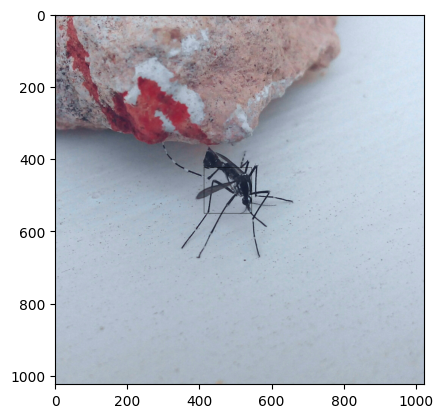

In [56]:
i = 4
img = bs['img'][i]
img = (img - img.min()) / (img.max() - img.min())
bbox = bboxes[i]
img_bbox = draw_bounding_boxes(th.tensor(255*img, dtype=th.uint8), th.unsqueeze(bbox, 0))
show(img_bbox)
plt.show()

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline 

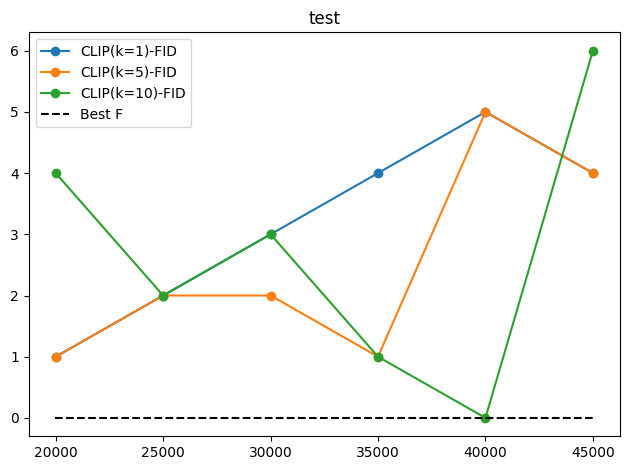

In [18]:
epochs = [20000, 25000, 30000, 35000, 40000, 45000]
fids = {
    'k=1': [1, 2, 3, 4, 5, 4],
    'k=5': [1, 2, 2, 1, 5, 4],
    'k=10': [4, 2, 3, 1, 0, 6],
}
best_fid = 0
title = 'test'

plt.title(title)
for key, value in fids.items():
    plt.plot(epochs, value, '-o', label=f'CLIP({key})-FID')

plt.plot([epochs[0]-10, epochs[-1]+10], [best_fid, best_fid], '--k', label='Best F')
plt.legend()
plt.tight_layout()
plt.savefig('test.png')